In [89]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [90]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [91]:
bac = web.DataReader('BAC', 'yahoo', start, end)
c = web.DataReader('C', 'yahoo', start, end)
gs = web.DataReader('GS', 'yahoo', start, end)
jpm = web.DataReader('JPM', 'yahoo', start, end)
ms = web.DataReader('MS', 'yahoo', start, end)
wfc = web.DataReader('WFC', 'yahoo', start, end)

In [92]:
tickers = ['bac', 'c', 'gs', 'jpm', 'ms', 'wfc']

In [93]:
type(bac)

pandas.core.frame.DataFrame

In [94]:
bank_stocks = pd.concat([bac,c,gs,jpm,ms,wfc],axis=1, keys=tickers)

In [95]:
bank_stocks.head(2)

bac                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.953278   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.571438   

                     c                                      ...         ms  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                wfc                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  38.292645  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  38.318924  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.246769  
2006-01-04  31.530001  10870000.0  21.000326  

[2 rows x 36 columns]

In [96]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [97]:
bank_stocks.head(5)

Bank Ticker        bac                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      c                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.617275  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.563797  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.586720  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         ms                                         wfc             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.292645  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.318924  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.423988  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.463394  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.870537  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.246769  
2006-01-04   31.799999  31.530001  10870000.0  21.000326  
2006-01-05   31.500000  31.495001  10158000.0  20.977020  
2006-01-06   31.580000  31.680000   8403800.0  21.100231  
2006-01-09   31.674999  31.674999   5619600.0  21.096903  

[5 rows x 36 columns]

In [98]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
bac     54.900002
c      564.099976
gs     247.919998
jpm     70.080002
ms      89.300003
wfc     58.520000
dtype: float64

In [100]:
returns = pd.DataFrame()

In [101]:
for tick in tickers:
    returns[tick+' Returns'] =  bank_stocks[tick]['Close'].pct_change()
returns.head()

,bac Returns,c Returns,gs Returns,jpm Returns,ms Returns,wfc Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



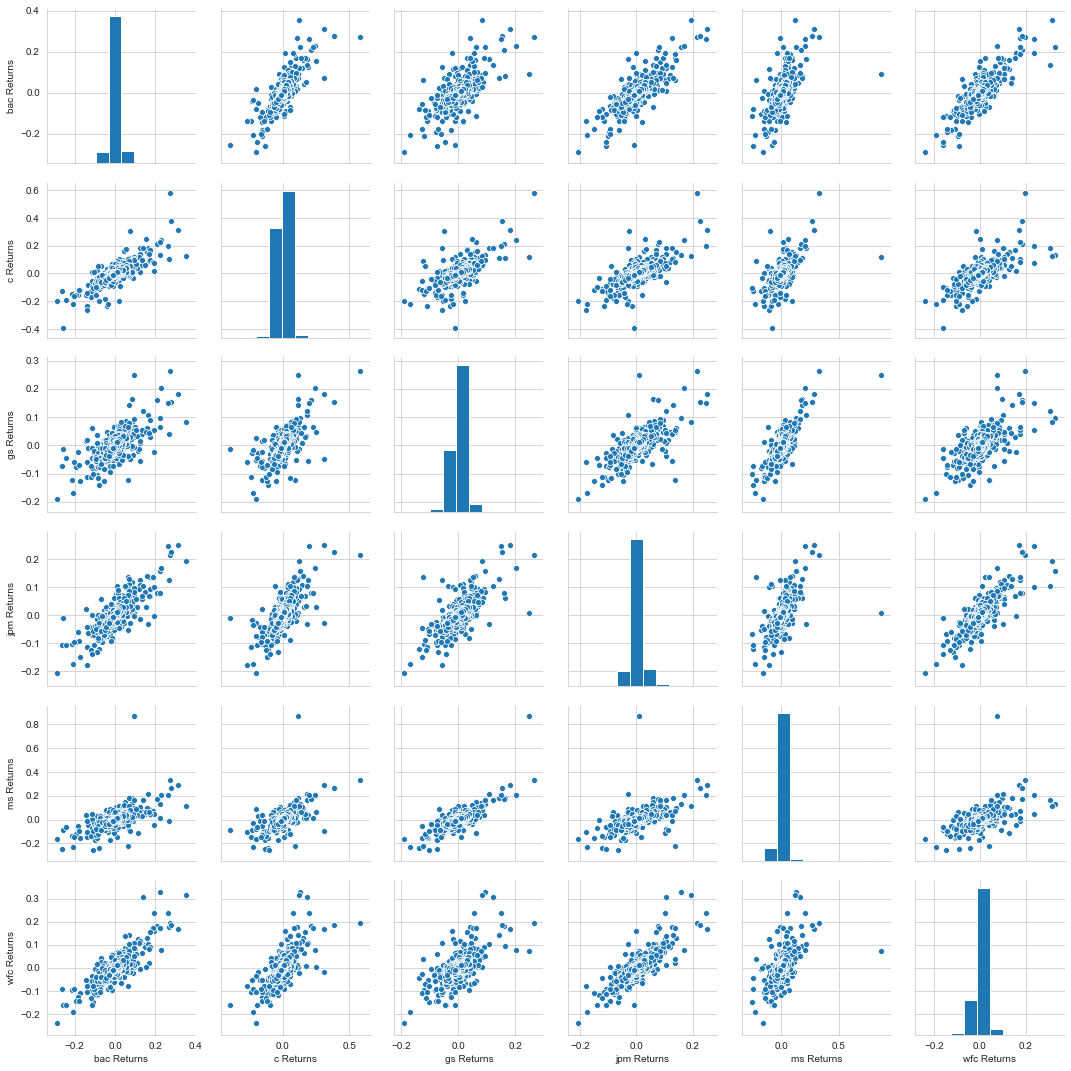

In [102]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns)

In [103]:
returns.idxmin()

bac Returns   2009-01-20
c Returns     2009-02-27
gs Returns    2009-01-20
jpm Returns   2009-01-20
ms Returns    2008-10-09
wfc Returns   2009-01-20
dtype: datetime64[ns]

In [104]:
returns.idxmax()

bac Returns   2009-04-09
c Returns     2008-11-24
gs Returns    2008-11-24
jpm Returns   2009-01-21
ms Returns    2008-10-13
wfc Returns   2008-07-16
dtype: datetime64[ns]

In [105]:
returns.std()

bac Returns    0.036647
c Returns      0.038672
gs Returns     0.025390
jpm Returns    0.027667
ms Returns     0.037819
wfc Returns    0.030238
dtype: float64

In [106]:
returns.ix['2015-01-01':'2015-12-31'].std() 

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



bac Returns    0.016163
c Returns      0.015289
gs Returns     0.014046
jpm Returns    0.014017
ms Returns     0.016249
wfc Returns    0.012591
dtype: float64

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



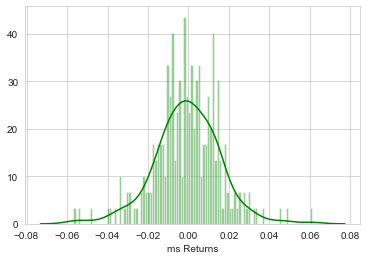

In [107]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['ms Returns'], bins=100, color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

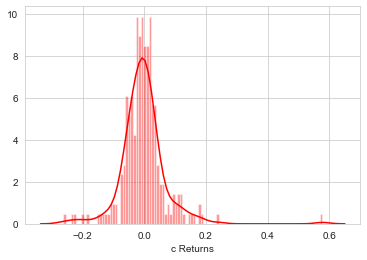

In [108]:
sns.distplot(returns['2008-01-01':'2009-01-01']['c Returns'], color='red', bins = 100)

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

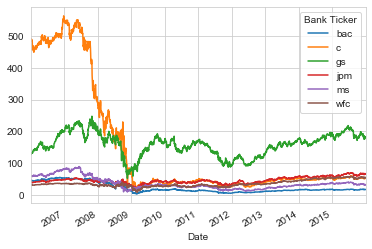

In [110]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

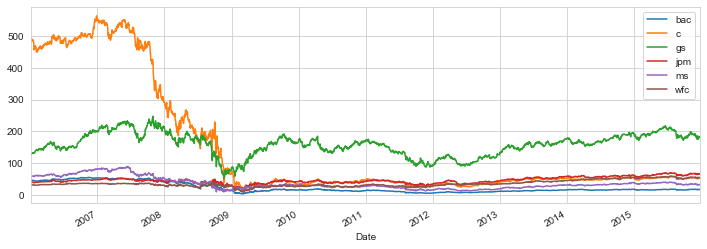

In [111]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



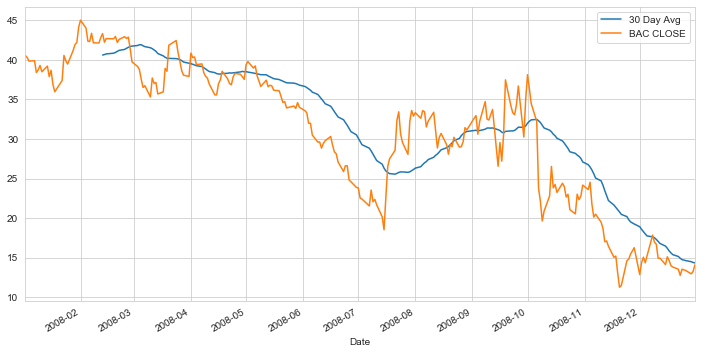

In [112]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [113]:
bac[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [114]:
ms['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [115]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

c:\users\katta's\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

